EDA

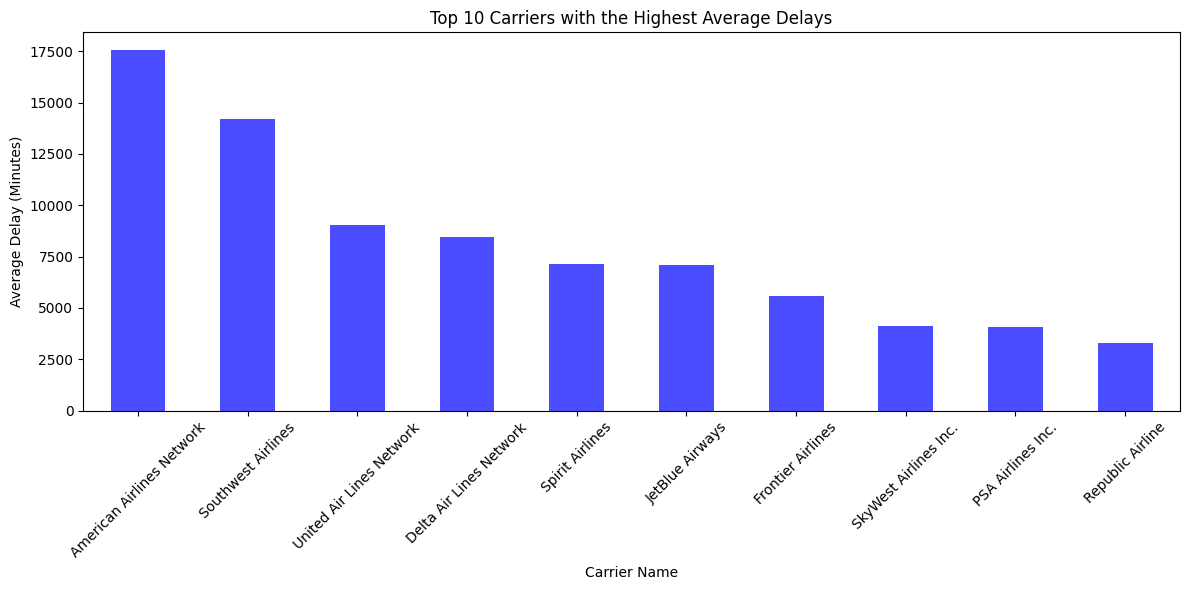

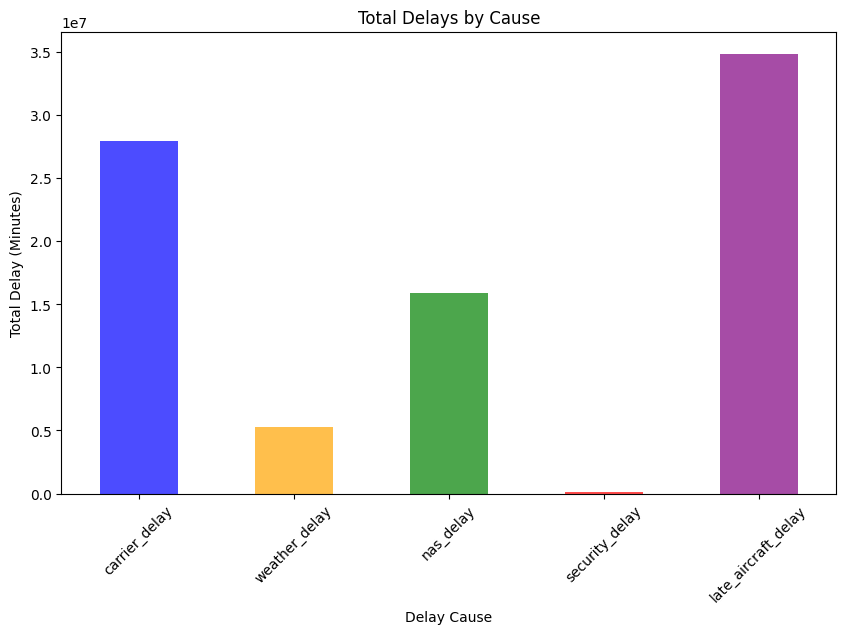

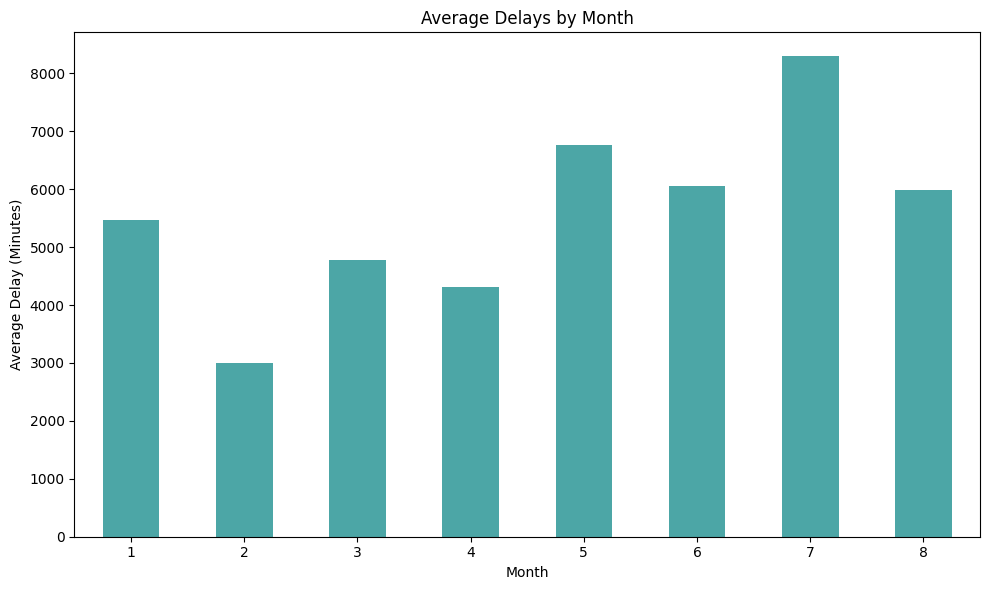

                     Missing Values  year  month  arr_flights  arr_del15  \
year                              0   NaN    NaN          NaN        NaN   
month                             0   NaN    NaN          NaN        NaN   
carrier                           0   NaN    NaN          NaN        NaN   
carrier_name                      0   NaN    NaN          NaN        NaN   
airport                           0   NaN    NaN          NaN        NaN   
airport_name                      0   NaN    NaN          NaN        NaN   
arr_flights                       0   NaN    NaN          NaN        NaN   
arr_del15                         0   NaN    NaN          NaN        NaN   
carrier_ct                        0   NaN    NaN          NaN        NaN   
weather_ct                        0   NaN    NaN          NaN        NaN   
nas_ct                            0   NaN    NaN          NaN        NaN   
security_ct                       0   NaN    NaN          NaN        NaN   
late_aircraf

(          year         month   arr_flights     arr_del15    carrier_ct  \
 count  15060.0  15060.000000  15060.000000  15060.000000  15060.000000   
 mean    2024.0      4.506640    333.552789     75.010159     23.193724   
 std        0.0      2.292021    967.079797    219.415029     60.956952   
 min     2024.0      1.000000      1.000000      0.000000      0.000000   
 25%     2024.0      3.000000     44.000000      7.000000      2.330000   
 50%     2024.0      5.000000     90.000000     19.000000      6.500000   
 75%     2024.0      6.000000    221.000000     51.000000     18.002500   
 max     2024.0      8.000000  20679.000000   5544.000000   1886.580000   
 
          weather_ct        nas_ct   security_ct  late_aircraft_ct  \
 count  15060.000000  15060.000000  15060.000000      15060.000000   
 mean       2.994371     20.250037      0.205287         28.359275   
 std       10.527426     64.914820      0.840971         93.908210   
 min        0.000000      0.000000      0.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset directly from the Colab session storage
file_path = '/content/Airline_Delay_Cause.xlsx'  # Adjusted for Colab session storage
data = pd.ExcelFile(file_path)

# Load the primary sheet
df = data.parse('Airline_Delay_Cause')

# Preprocess data by replacing missing values with median values for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

# Perform basic exploratory data analysis (EDA)

# Summary statistics
summary_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Calculate average delay for each carrier
carrier_avg_delay = df.groupby('carrier_name')['arr_delay'].mean().sort_values(ascending=False)

# Extract the top 10 carriers with the highest average delays
top_10_carriers = carrier_avg_delay.head(10)

# Plot the top 10 carriers
plt.figure(figsize=(12, 6))
top_10_carriers.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 Carriers with the Highest Average Delays')
plt.xlabel('Carrier Name')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

top_10_carriers

# Visualizing the contributions of different delay causes
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delay_sums = df[delay_causes].sum()

plt.figure(figsize=(10, 6))
delay_sums.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
plt.title('Total Delays by Cause')
plt.xlabel('Delay Cause')
plt.ylabel('Total Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

# Proportions of each delay cause
delay_proportions = (delay_sums / delay_sums.sum()) * 100

# 3. Average Delays by Month
average_monthly_delays = df.groupby('month')['arr_delay'].mean()

plt.figure(figsize=(10, 6))
average_monthly_delays.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Average Delays by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Display the summary statistics and missing values
summary_and_missing = pd.DataFrame({'Missing Values': missing_values}).join(summary_stats)
print(summary_and_missing)

summary_stats, missing_values, delay_proportions


HYPOTHESIS SOME AIRLINES HAVE CONSISTENT DELAY PATTERNS

Chi-Square Test Results:
Chi-Square Statistic: 1875.5308043818782
Degrees of Freedom: 40
P-Value: 0.0
Reject the null hypothesis: Delays are not independent of the airline.

Top Airlines Contributing to Dependency:
                 carrier_name Delay Category  Residuals
2               Allegiant Air            Low  13.187599
11                Horizon Air            Low  12.272047
18         Southwest Airlines            Low -11.029785
3   American Airlines Network            Low -10.912530
60         Southwest Airlines           High   9.321504

Delay Cause Analysis by Airline:
                                         weather_delay  carrier_delay  \
carrier_name                                                            
Air Wisconsin Airlines Corp                  11.522680      22.177268   
Alaska Airlines Network                       3.990963      28.924534   
Allegiant Air                                10.133272      34.226796   
American Airlines Network                     5.59

<Figure size 1200x800 with 0 Axes>

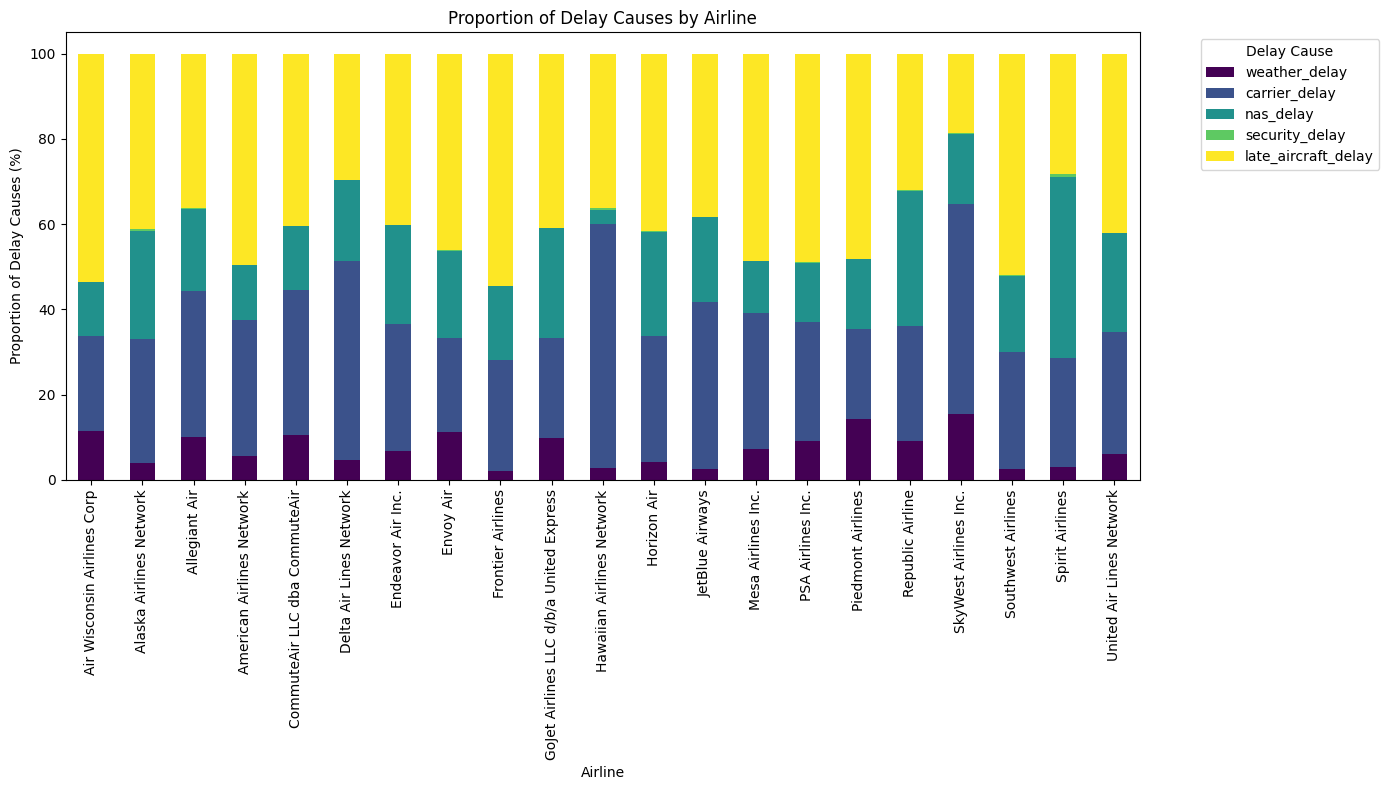

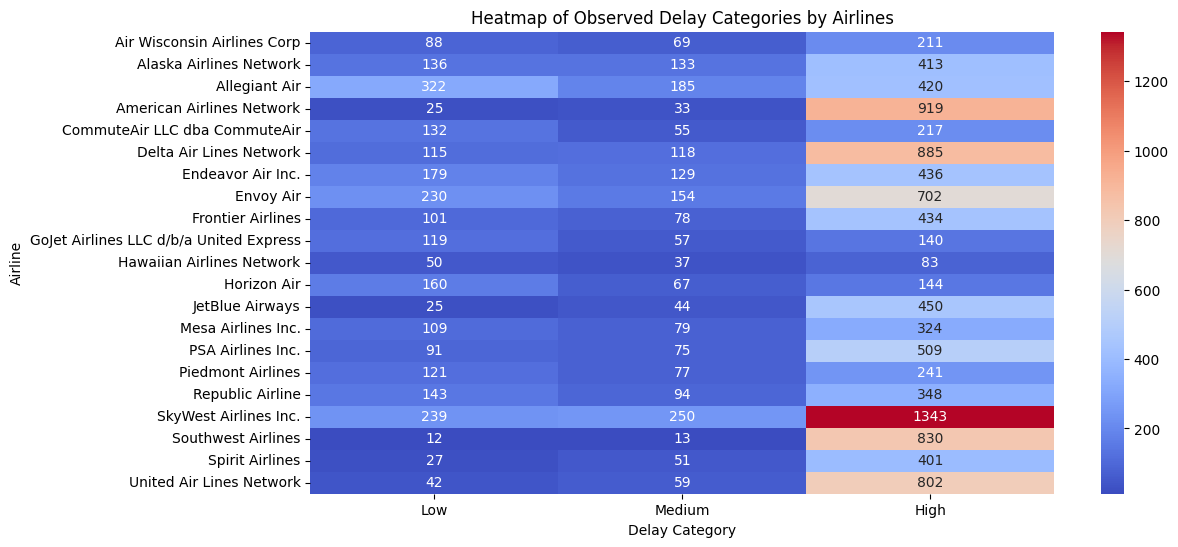

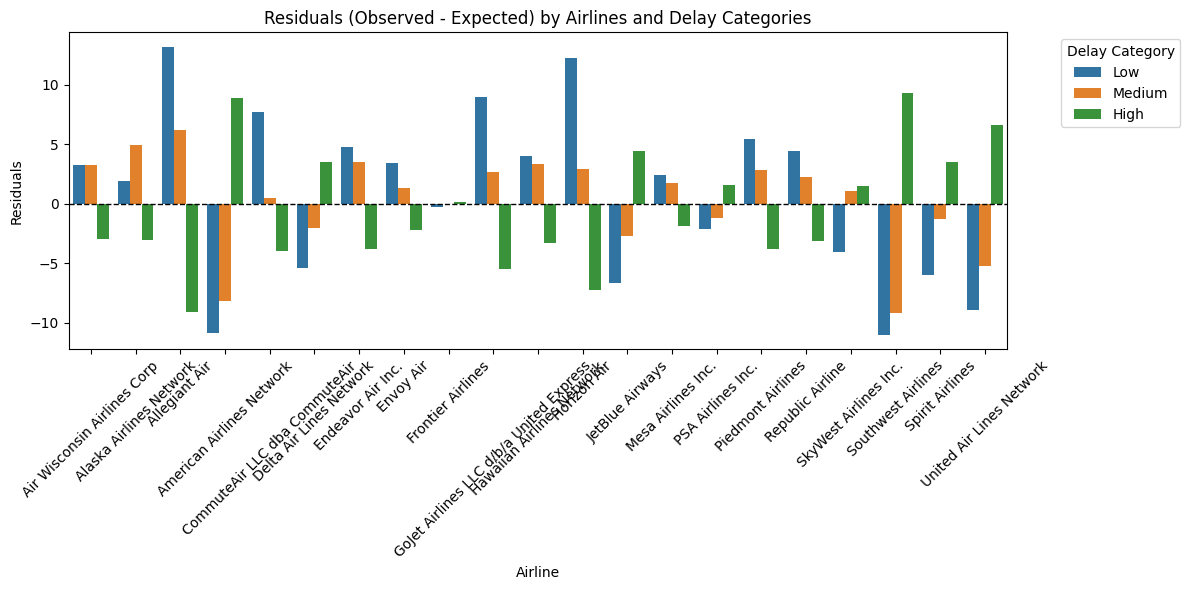

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bin delays into categories (Low, Medium, High) for Chi-Square analysis
delay_bins = pd.cut(df['arr_delay'], bins=[0, 300, 600, np.inf], labels=["Low", "Medium", "High"])
df['delay_category'] = delay_bins

# Create a contingency table: Airlines vs Delay Categories
contingency_table = pd.crosstab(df['carrier_name'], df['delay_category'])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Add residuals (observed - expected) to identify dependent airlines
residuals = (contingency_table - expected) / np.sqrt(expected)
residuals = residuals.reset_index()

# Display Chi-Square results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value}")

# Interpret Chi-Square Results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Delays are not independent of the airline.")
else:
    print("Fail to reject the null hypothesis: Delays are independent of the airline.")

# Airlines contributing the most to the Chi-Square statistic
residuals_melted = residuals.melt(id_vars='carrier_name', var_name='Delay Category', value_name='Residuals')
top_contributors = residuals_melted.loc[residuals_melted['Residuals'].abs().sort_values(ascending=False).index[:5]]
print("\nTop Airlines Contributing to Dependency:")
print(top_contributors)

# Step 1: Analyze the causes of delays for each airline
delay_causes = ['weather_delay', 'carrier_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Calculate the proportion of each delay cause for each airline
cause_proportions = df.groupby('carrier_name')[delay_causes].sum()
cause_proportions = cause_proportions.div(cause_proportions.sum(axis=1), axis=0) * 100

# Find the leading cause of delay for each airline
cause_proportions['Leading Cause'] = cause_proportions.idxmax(axis=1)
print("\nDelay Cause Analysis by Airline:")
print(cause_proportions)

# Step 2: Visualization - Contribution of delay causes by airline
plt.figure(figsize=(12, 8))
cause_proportions.drop('Leading Cause', axis=1).plot(kind='bar', stacked=True, figsize=(14, 8), colormap="viridis")
plt.title("Proportion of Delay Causes by Airline")
plt.xlabel("Airline")
plt.ylabel("Proportion of Delay Causes (%)")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 1: Heatmap of Observed vs Expected counts
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt='g', cbar=True)
plt.title("Heatmap of Observed Delay Categories by Airlines")
plt.xlabel("Delay Category")
plt.ylabel("Airline")
plt.show()

# Visualization 2: Contribution of Airlines to Chi-Square
plt.figure(figsize=(12, 6))
sns.barplot(data=residuals_melted, x='carrier_name', y='Residuals', hue='Delay Category')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title("Residuals (Observed - Expected) by Airlines and Delay Categories")
plt.xlabel("Airline")
plt.ylabel("Residuals")
plt.xticks(rotation=45)
plt.legend(title='Delay Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

One-way ANOVA Test Results:
F-statistic: 46.72446252818196
p-value: 2.3700005593654222e-179
Reject the null hypothesis: There are significant differences in mean arrival delays among airlines.


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,



Tukey's HSD Test Results:
                                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                                       
                 group1                                  group2                   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------------------------------------------------------------------
            Air Wisconsin Airlines Corp                 Alaska Airlines Network  -7380.1708    0.0 -10389.5778  -4370.7638   True
            Air Wisconsin Airlines Corp                           Allegiant Air  -6472.9811    0.0  -9374.3077  -3571.6545   True
            Air Wisconsin Airlines Corp               American Airlines Network  -6232.0394    0.0   -9519.488  -2944.5908   True
            Air Wisconsin Airlines Corp           CommuteAir LLC dba CommuteAir  -7368.6306    0.0 -11148.7694  -3588.4918   True
            Air Wisconsin Airlines Corp                 Delta A

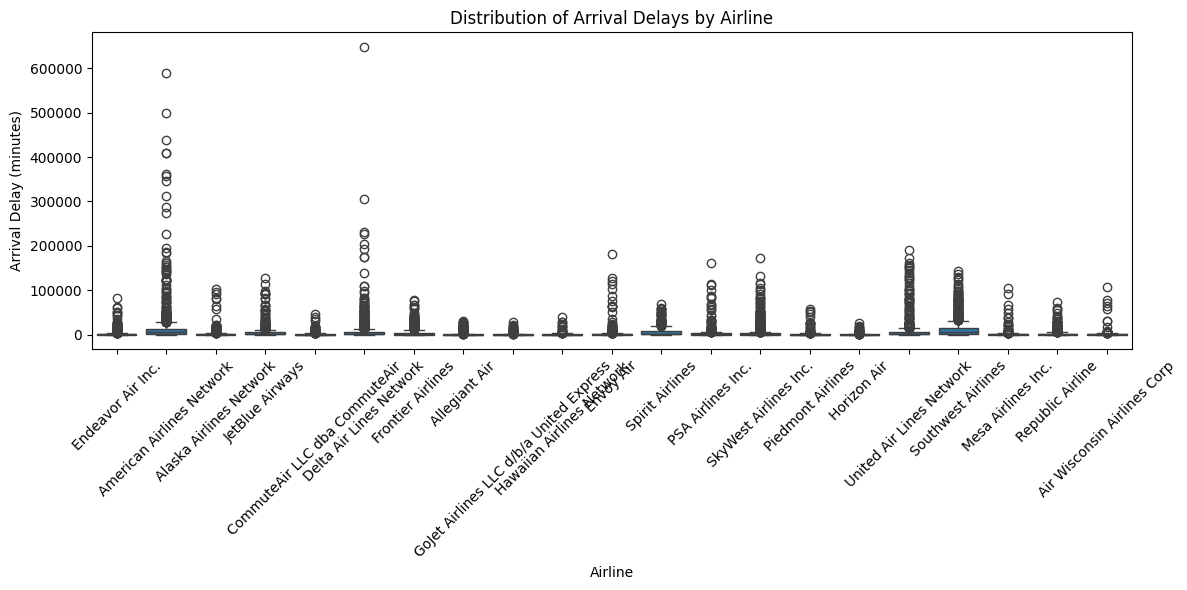

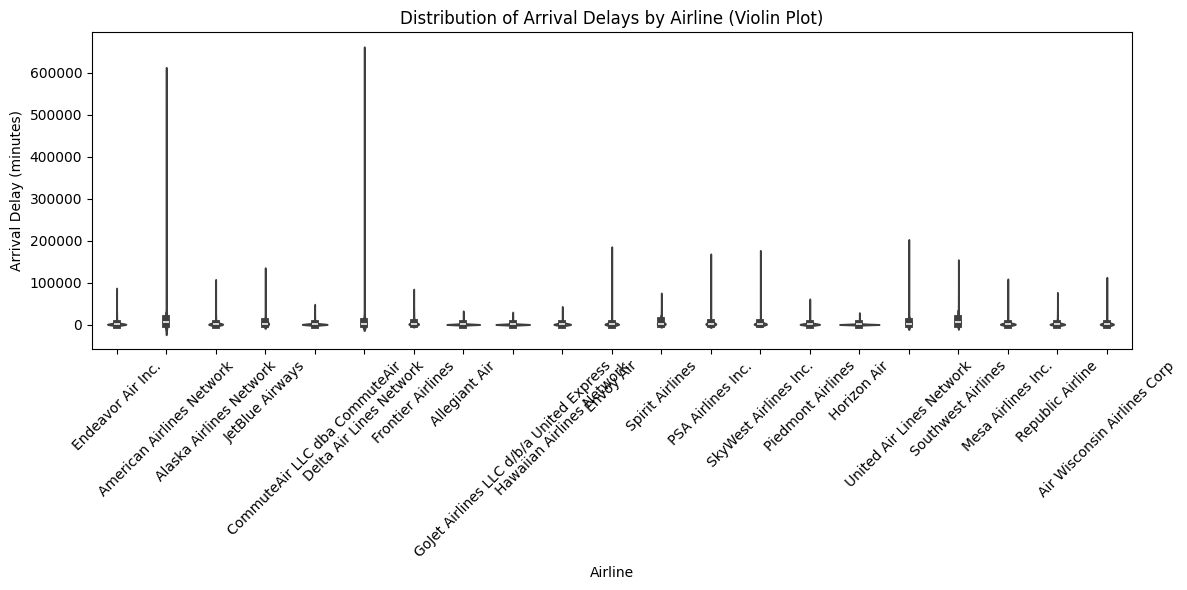

<ipython-input-3-af5ebbb6aa2b>:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='carrier_name', y='arr_delay', data=df, ci=95, capsize=0.2)


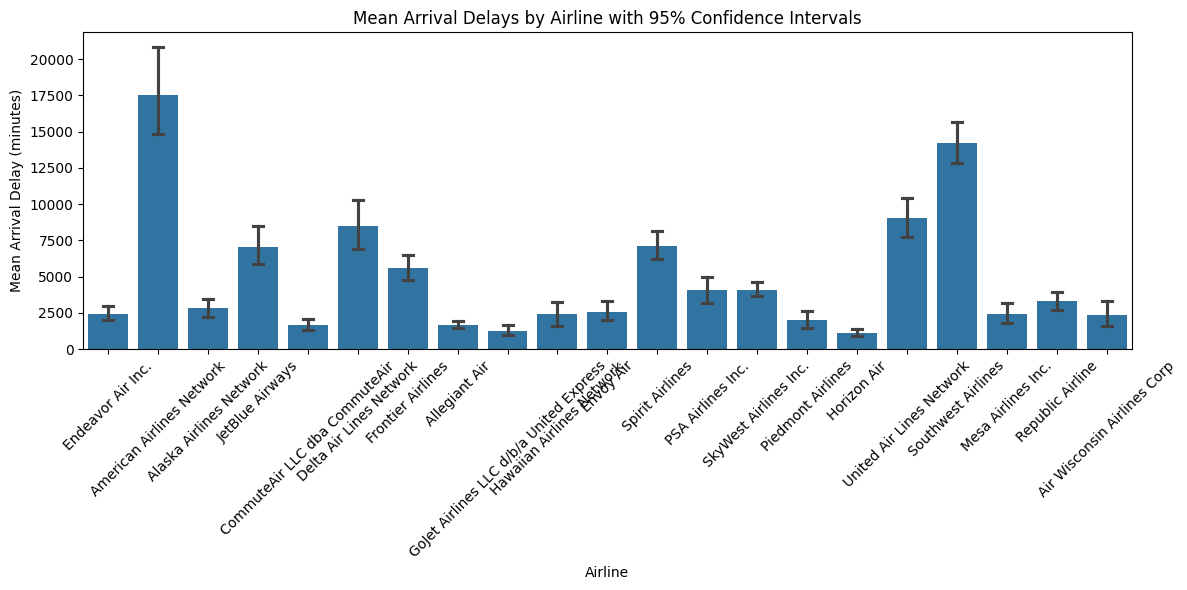

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'carrier_name' and 'arr_delay' columns

# Step 1: Prepare data for ANOVA
airline_groups = [group for _, group in df.groupby('carrier_name')['arr_delay']]

# Step 2: Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*airline_groups)

# Step 3: Display ANOVA results
print("One-way ANOVA Test Results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Step 4: Interpret ANOVA results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in mean arrival delays among airlines.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in mean arrival delays among airlines.")

# Step 5: Post-hoc analysis (Tukey's HSD test)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for Tukey's test
airline_names = np.repeat(df['carrier_name'].unique(), df.groupby('carrier_name').size())
delays = np.concatenate(airline_groups)

# Perform Tukey's test
tukey_results = pairwise_tukeyhsd(delays, airline_names)

# Display Tukey's test results
print("\nTukey's HSD Test Results:")
print(tukey_results)

# Step 6: Visualizations

# Box plot of arrival delays by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier_name', y='arr_delay', data=df)
plt.title("Distribution of Arrival Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin plot of arrival delays by airline
plt.figure(figsize=(12, 6))
sns.violinplot(x='carrier_name', y='arr_delay', data=df)
plt.title("Distribution of Arrival Delays by Airline (Violin Plot)")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mean arrival delays by airline with confidence intervals
plt.figure(figsize=(12, 6))
sns.barplot(x='carrier_name', y='arr_delay', data=df, ci=95, capsize=0.2)
plt.title("Mean Arrival Delays by Airline with 95% Confidence Intervals")
plt.xlabel("Airline")
plt.ylabel("Mean Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


HYPOTHESIS Delays are More Frequent During Peak Travel Months

T-Test Results:
T-Statistic: 12.264911337453972
P-Value: 2.0404002802140917e-34
Reject the null hypothesis: Delays are more frequent during peak travel months.

Month with the Highest Delays: 7 (Avg Delay: 28.12%)
Leading Cause of Delays in 7: late_aircraft_delay (6631055.0 minutes)


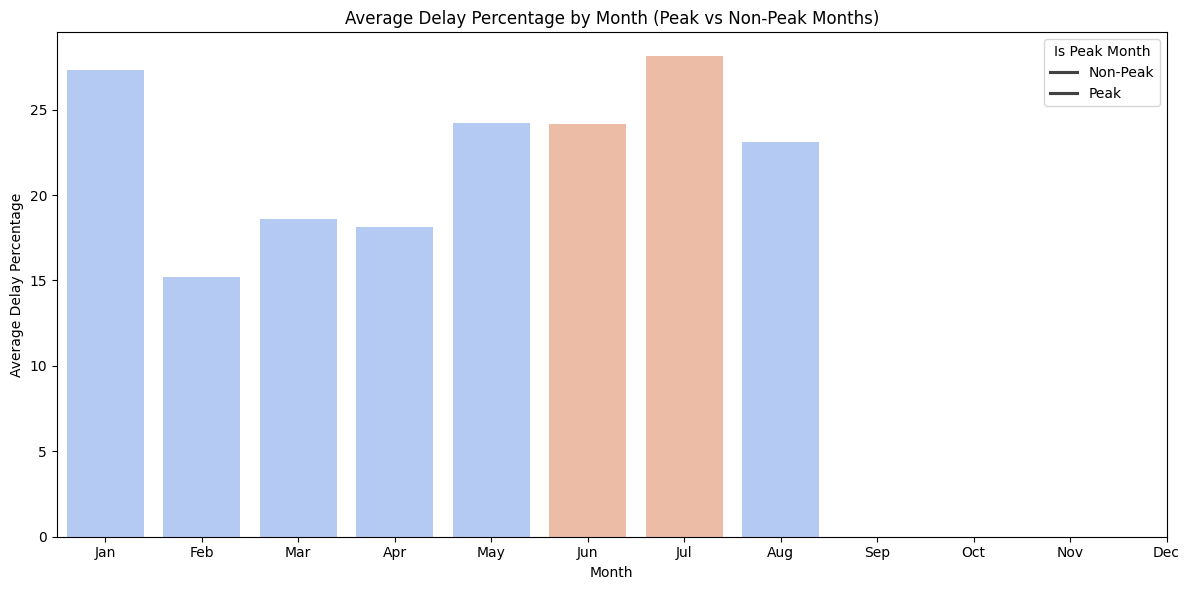

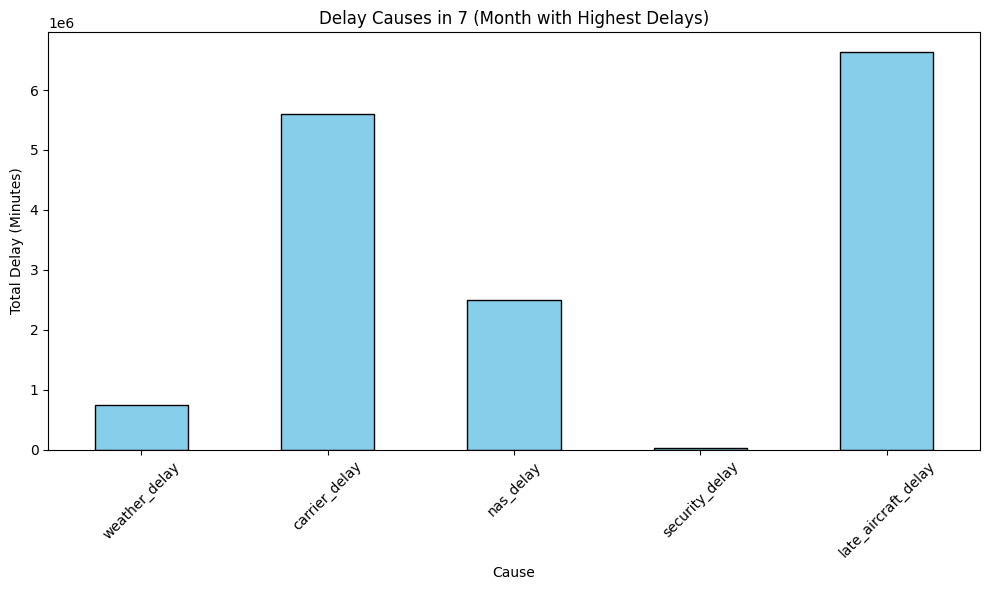

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Step 1: Create peak and non-peak month categories
df['is_peak_month'] = df['month'].apply(lambda x: 1 if x in [6, 7, 12] else 0)

# Step 2: Calculate delay percentage for each month
df['delay_percentage'] = (df['arr_del15'] / df['arr_flights']) * 100

# Group by month and calculate the average delay percentage
monthly_delay = df.groupby(['month', 'is_peak_month'])['delay_percentage'].mean().reset_index()

# Step 3: Split data into peak and non-peak months for hypothesis testing
peak_delays = df[df['is_peak_month'] == 1]['delay_percentage'].dropna()
non_peak_delays = df[df['is_peak_month'] == 0]['delay_percentage'].dropna()

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(peak_delays, non_peak_delays, equal_var=False)

# Display t-test results
print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Delays are more frequent during peak travel months.")
else:
    print("Fail to reject the null hypothesis: No significant difference in delay frequencies.")

# Step 4: Find the month with the highest delay percentage
highest_delay_month = monthly_delay.loc[monthly_delay['delay_percentage'].idxmax(), 'month']
highest_delay_percentage = monthly_delay['delay_percentage'].max()
print(f"\nMonth with the Highest Delays: {highest_delay_month} (Avg Delay: {highest_delay_percentage:.2f}%)")

# Step 5: Analyze the causes of delays for each month
delay_causes = ['weather_delay', 'carrier_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
monthly_cause_totals = df.groupby('month')[delay_causes].sum()

# Find the leading cause of delays for the month with the highest delays
leading_cause = monthly_cause_totals.loc[highest_delay_month].idxmax()
leading_cause_value = monthly_cause_totals.loc[highest_delay_month].max()

print(f"Leading Cause of Delays in {highest_delay_month}: {leading_cause} ({leading_cause_value} minutes)")

# Step 6: Visualization - Monthly delays and delay causes
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='delay_percentage', data=monthly_delay, hue='is_peak_month', palette="coolwarm")
plt.title("Average Delay Percentage by Month (Peak vs Non-Peak Months)")
plt.xlabel("Month")
plt.ylabel("Average Delay Percentage")
plt.legend(title="Is Peak Month", labels=["Non-Peak", "Peak"])
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

# Step 7: Visualization - Delay causes for the highest delay month
highest_month_causes = monthly_cause_totals.loc[highest_delay_month]
highest_month_causes.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title(f"Delay Causes in {highest_delay_month} (Month with Highest Delays)")
plt.xlabel("Cause")
plt.ylabel("Total Delay (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Chi-square Test Results:
Chi-square statistic: 6.201632774709231
P-Value: 0.012763251921821954
Degrees of freedom: 1
Reject the null hypothesis: There is a significant association between peak/non-peak months and delay frequencies.


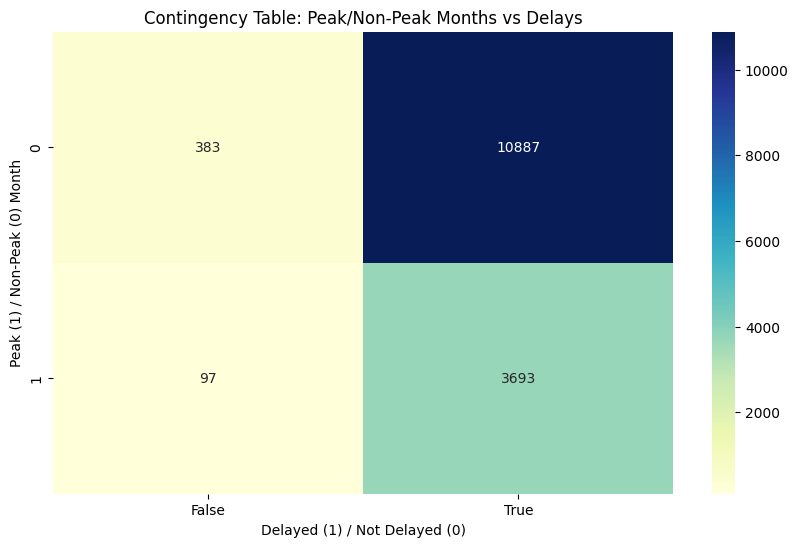


Effect Size (Cramer's V): 0.020292732811545425
Interpretation:
Negligible effect

Month with the Highest Delays: 7 (Avg Delay: 28.12%)
Leading Cause of Delays in 7: late_aircraft_delay (6631055.0 minutes)


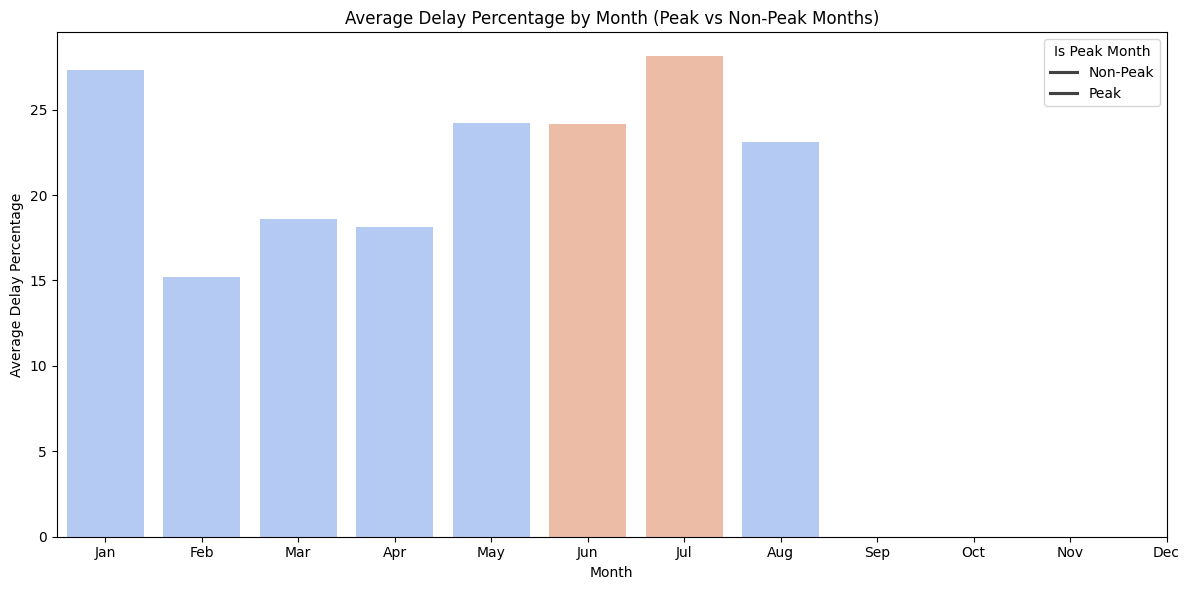

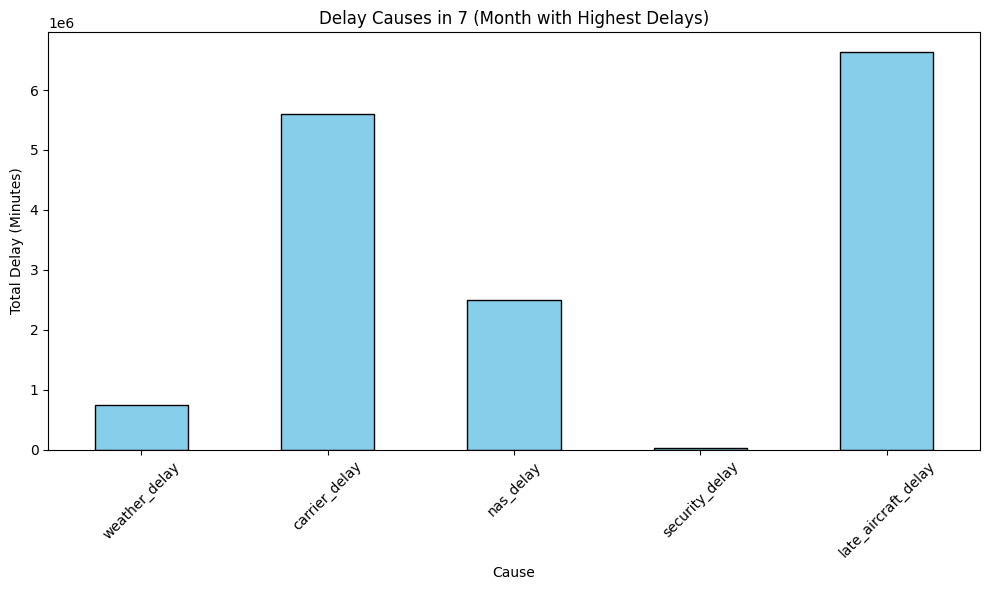

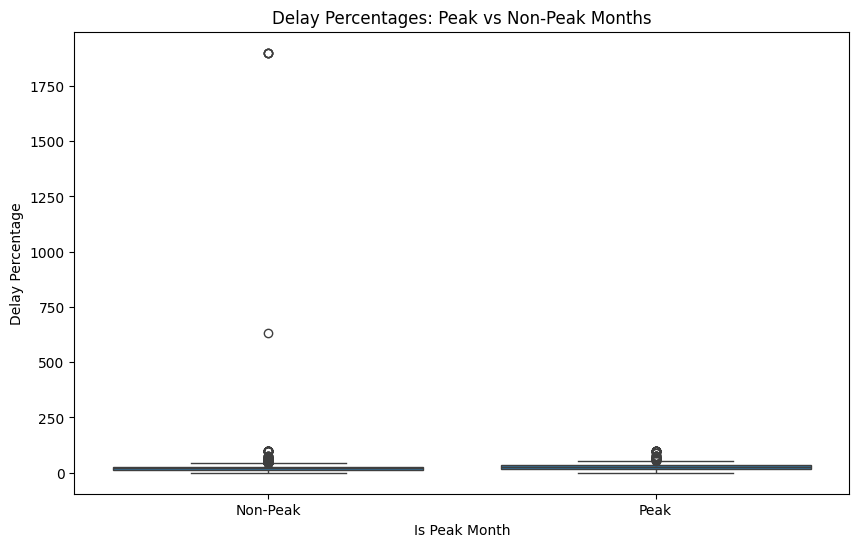

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the dataset (assuming it's already loaded as 'df')
# If not, uncomment and modify the following line:
# df = pd.read_excel('/content/Airline_Delay_Cause.xlsx', sheet_name='Airline_Delay_Cause')

# Step 1: Create peak and non-peak month categories
df['is_peak_month'] = df['month'].apply(lambda x: 1 if x in [6, 7, 12] else 0)

# Step 2: Calculate delay percentage for each month
df['delay_percentage'] = (df['arr_del15'] / df['arr_flights']) * 100

# Group by month and calculate the average delay percentage
monthly_delay = df.groupby(['month', 'is_peak_month'])['delay_percentage'].mean().reset_index()

# Step 3: Prepare data for Chi-square test
# Create a contingency table
contingency_table = pd.crosstab(df['is_peak_month'], df['arr_del15'] > 0)

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display Chi-square test results
print("Chi-square Test Results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of freedom: {dof}")

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between peak/non-peak months and delay frequencies.")
else:
    print("Fail to reject the null hypothesis: No significant association between peak/non-peak months and delay frequencies.")

# Visualization of contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Contingency Table: Peak/Non-Peak Months vs Delays")
plt.xlabel("Delayed (1) / Not Delayed (0)")
plt.ylabel("Peak (1) / Non-Peak (0) Month")
plt.show()

# Additional analysis: Effect size calculation (Cramer's V)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"\nEffect Size (Cramer's V): {cramer_v}")
print("Interpretation:")
if cramer_v < 0.1:
    print("Negligible effect")
elif cramer_v < 0.3:
    print("Small effect")
elif cramer_v < 0.5:
    print("Medium effect")
else:
    print("Large effect")

# The rest of the code remains the same as in the original version

# Step 4: Find the month with the highest delay percentage
highest_delay_month = monthly_delay.loc[monthly_delay['delay_percentage'].idxmax(), 'month']
highest_delay_percentage = monthly_delay['delay_percentage'].max()
print(f"\nMonth with the Highest Delays: {highest_delay_month} (Avg Delay: {highest_delay_percentage:.2f}%)")

# Step 5: Analyze the causes of delays for each month
delay_causes = ['weather_delay', 'carrier_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
monthly_cause_totals = df.groupby('month')[delay_causes].sum()

# Find the leading cause of delays for the month with the highest delays
leading_cause = monthly_cause_totals.loc[highest_delay_month].idxmax()
leading_cause_value = monthly_cause_totals.loc[highest_delay_month].max()

print(f"Leading Cause of Delays in {highest_delay_month}: {leading_cause} ({leading_cause_value} minutes)")

# Step 6: Visualization - Monthly delays and delay causes
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='delay_percentage', data=monthly_delay, hue='is_peak_month', palette="coolwarm")
plt.title("Average Delay Percentage by Month (Peak vs Non-Peak Months)")
plt.xlabel("Month")
plt.ylabel("Average Delay Percentage")
plt.legend(title="Is Peak Month", labels=["Non-Peak", "Peak"])
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

# Step 7: Visualization - Delay causes for the highest delay month
highest_month_causes = monthly_cause_totals.loc[highest_delay_month]
highest_month_causes.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title(f"Delay Causes in {highest_delay_month} (Month with Highest Delays)")
plt.xlabel("Cause")
plt.ylabel("Total Delay (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Box plot of delay percentages for peak vs non-peak months
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_peak_month', y='delay_percentage', data=df)
plt.title("Delay Percentages: Peak vs Non-Peak Months")
plt.xlabel("Is Peak Month")
plt.ylabel("Delay Percentage")
plt.xticks([0, 1], ['Non-Peak', 'Peak'])
plt.show()


Hypothesis 1 Late Aircraft is the Primary Cause of Delays Across Most Airports

T-statistic: -17.56
P-value: 1.0000
Fail to reject the null hypothesis: Late aircraft delays are not significantly dominant.


<ipython-input-6-1bd0a0fe95f0>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


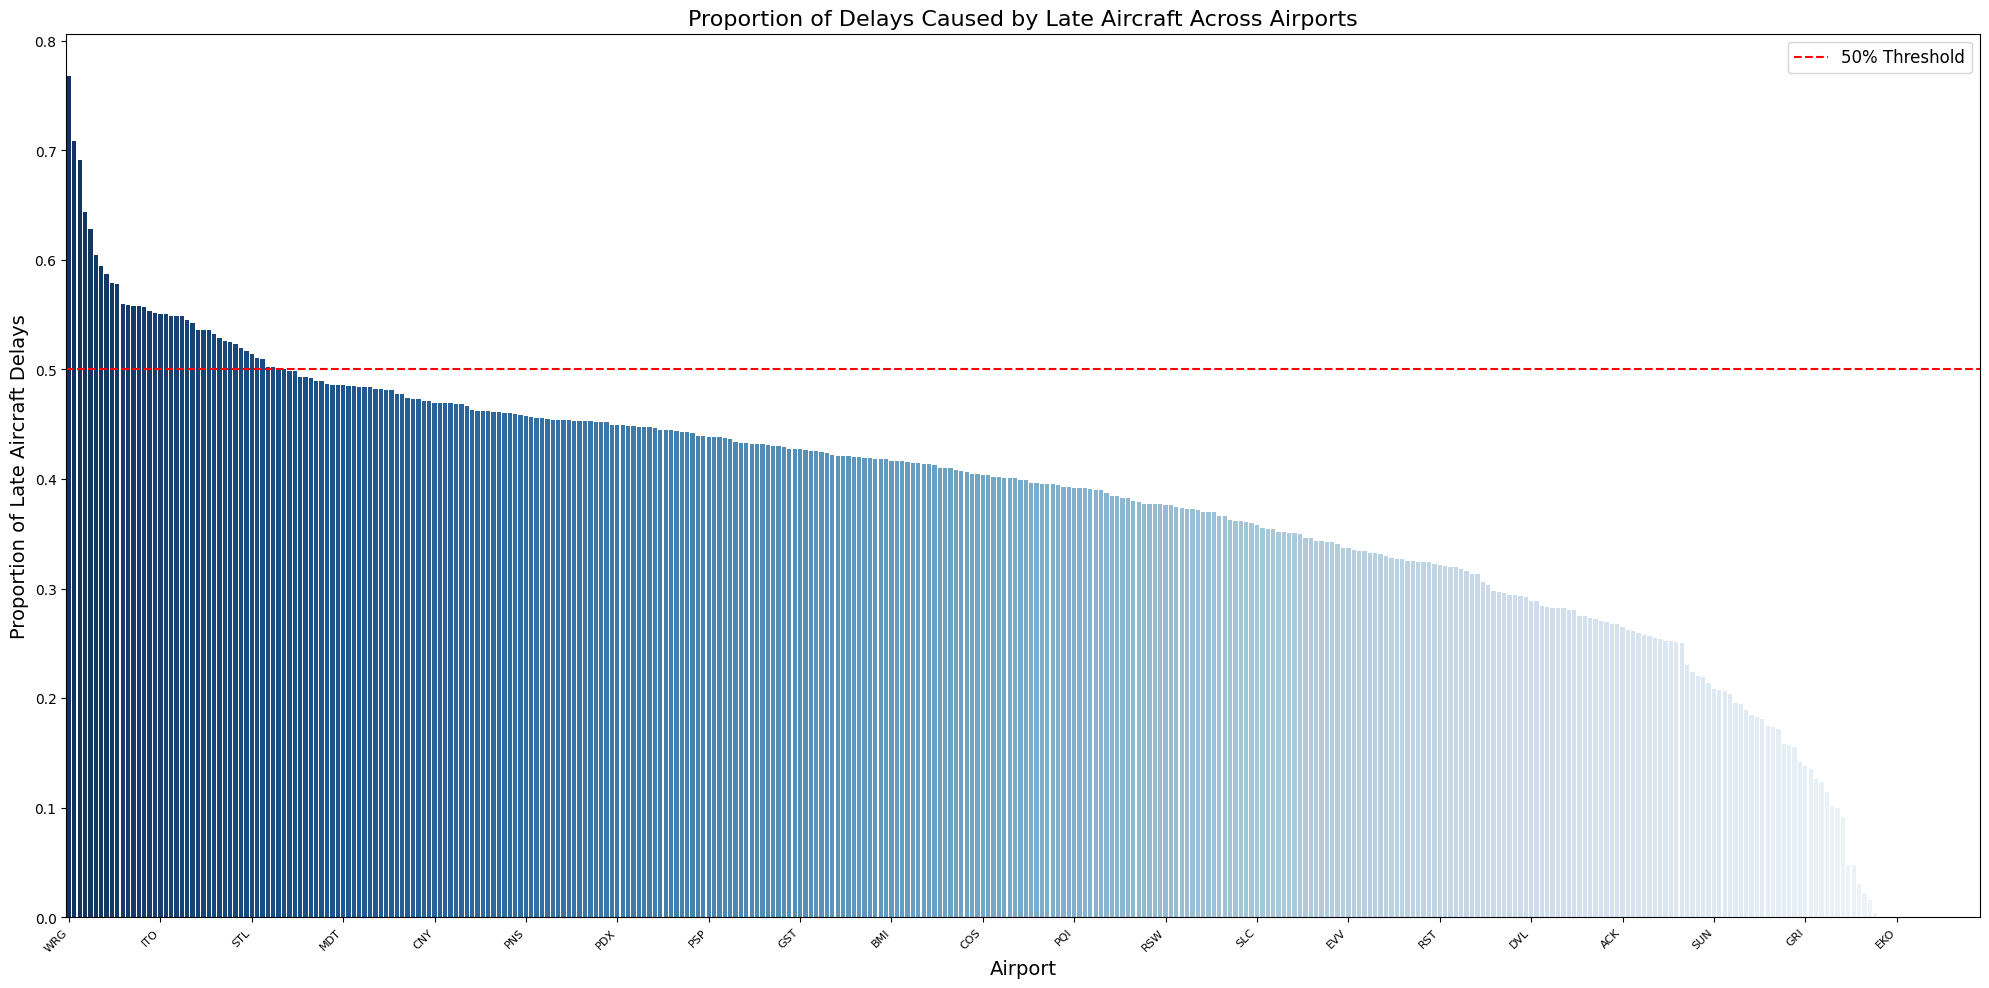

Late aircraft delays are the primary cause at 11.52% of airports.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

# Step 1: Load the Dataset
file_path = '/content/Airline_Delay_Cause.xlsx'
data = pd.read_excel(file_path)

# Step 2: Impute Missing Values
# Fill missing values with the median of each column
data_imputed = data.fillna(data.median(numeric_only=True))

# Step 3: Aggregate Data by Airport
airport_grouped = data_imputed.groupby('airport').agg({
    'arr_delay': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

# Calculate proportions
airport_grouped['late_aircraft_proportion'] = (
    airport_grouped['late_aircraft_delay'] / airport_grouped['arr_delay']
)
airport_grouped['other_causes_proportion'] = (
    (airport_grouped['carrier_delay'] +
     airport_grouped['weather_delay'] +
     airport_grouped['nas_delay'] +
     airport_grouped['security_delay']) / airport_grouped['arr_delay']
)

# Step 4: Perform Statistical Testing
# Null hypothesis: Proportion of late aircraft delays = 0.5
# Alternative hypothesis: Proportion of late aircraft delays > 0.5
t_stat, p_value = ttest_1samp(
    airport_grouped['late_aircraft_proportion'].dropna(),
    popmean=0.5,  # Test against 50%
    alternative='greater'  # One-tailed test
)

# Print the test results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Late aircraft delays are the primary cause of delays.")
else:
    print("Fail to reject the null hypothesis: Late aircraft delays are not significantly dominant.")

# Step 5: Sort the airport_grouped DataFrame by late_aircraft_proportion
airport_grouped_sorted = airport_grouped.sort_values(by='late_aircraft_proportion', ascending=False)

# Visualization with improvements
plt.figure(figsize=(20, 10))  # Increased figure size
sns.barplot(
    x='airport',
    y='late_aircraft_proportion',
    data=airport_grouped_sorted,
    palette="Blues_r"
)
plt.axhline(0.5, color='red', linestyle='--', label='50% Threshold', linewidth=1.5)
plt.title('Proportion of Delays Caused by Late Aircraft Across Airports', fontsize=16)
plt.xlabel('Airport', fontsize=14)
plt.ylabel('Proportion of Late Aircraft Delays', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotated 45 degrees, reduced font size
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()

# Label thinning
n = len(airport_grouped_sorted)
step = max(1, n // 20)  # Show about 20 labels
plt.xticks(range(0, n, step), [airport_grouped_sorted['airport'].iloc[i] for i in range(0, n, step)])

plt.show()

# Step 6: Summarize Results
# Percentage of airports where late aircraft delays > 50%
dominant_airports = (airport_grouped['late_aircraft_proportion'] > 0.5).mean() * 100
print(f"Late aircraft delays are the primary cause at {dominant_airports:.2f}% of airports.")

Wilcoxon signed-rank test statistic: 3709.00
P-value: 1.0000
Fail to reject the null hypothesis: Late aircraft delays are not significantly more than 50% of delays.


<ipython-input-7-db9eae0228ed>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


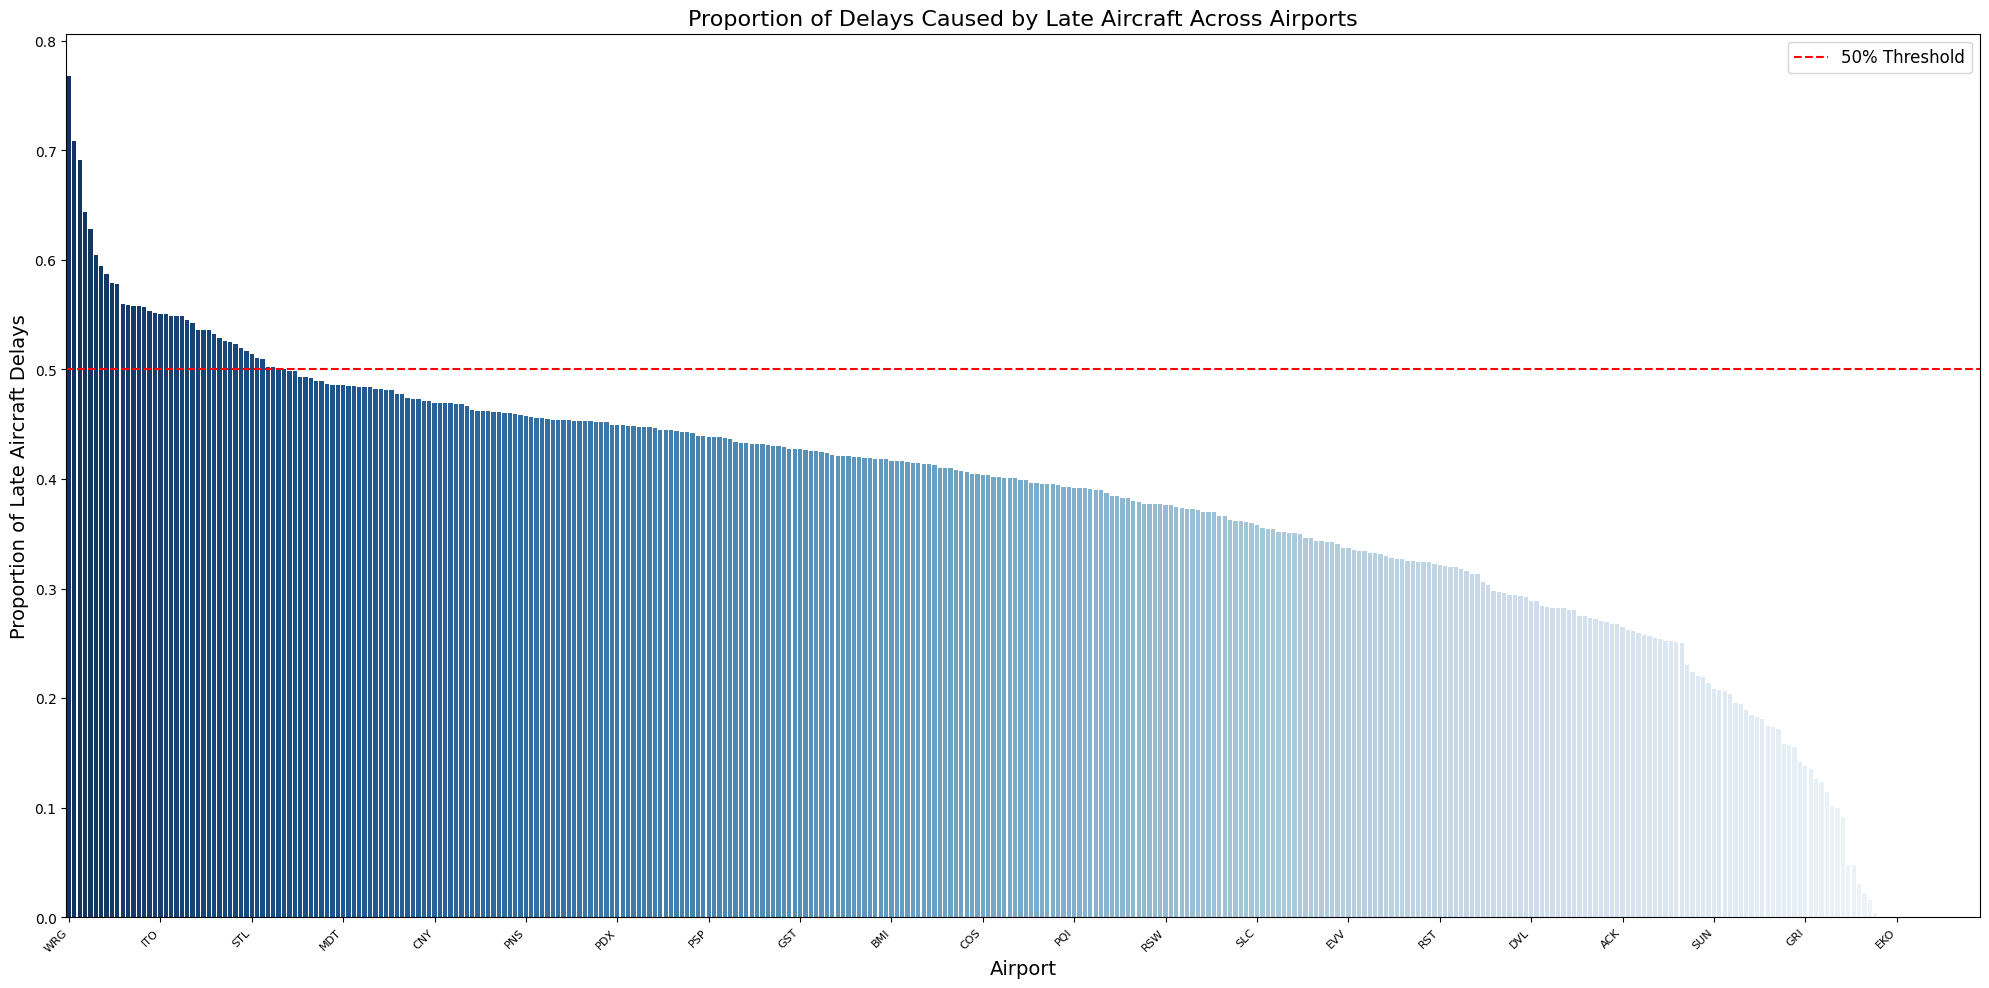

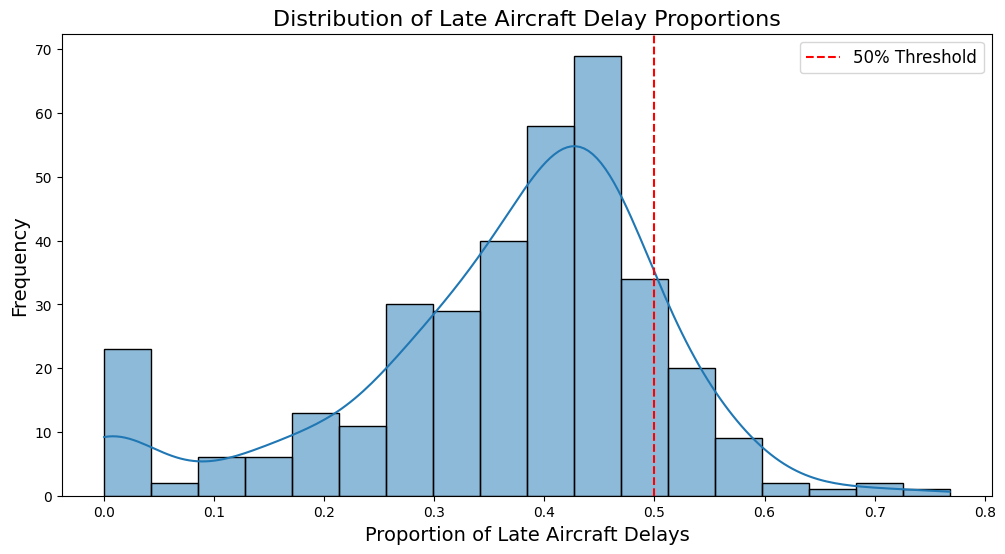

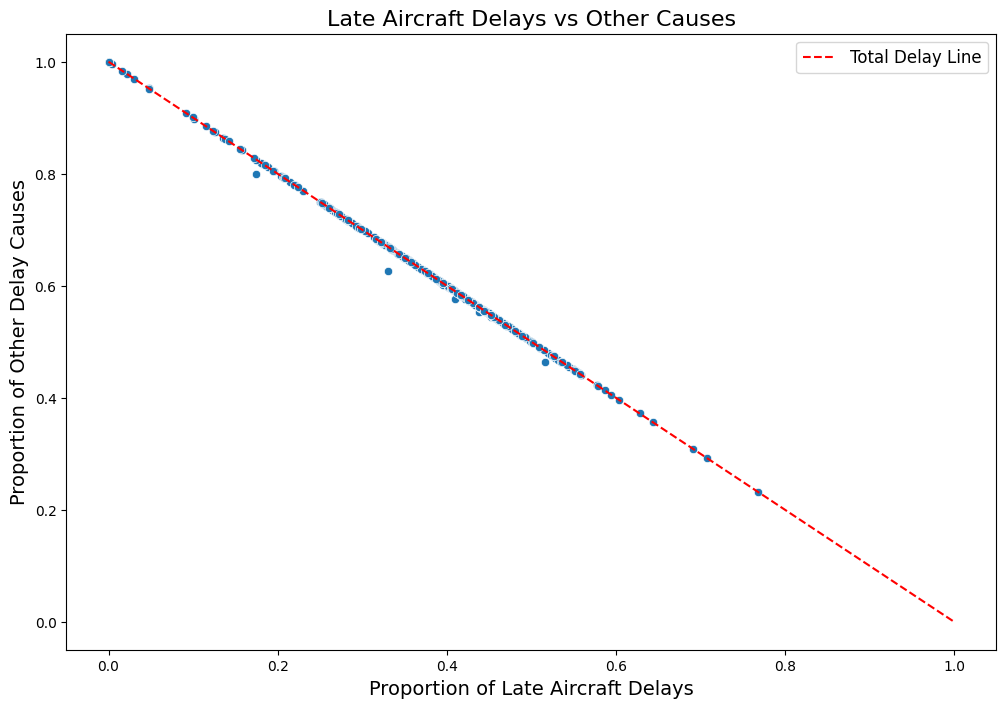

Late aircraft delays are the primary cause at 11.52% of airports.

Summary Statistics for Late Aircraft Delay Proportions:
count    356.000000
mean       0.365428
std        0.144603
min        0.000000
25%        0.296601
50%        0.399159
75%        0.454893
max        0.768164
Name: late_aircraft_proportion, dtype: float64

Top 5 Airports with Highest Late Aircraft Delay Proportions:
    airport  late_aircraft_proportion
349     WRG                  0.768164
353     YAK                  0.708068
20      ART                  0.690934
247     PAE                  0.644132
15      ALO                  0.628157


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

# Step 1: Load the Dataset
file_path = '/content/Airline_Delay_Cause.xlsx'
data = pd.read_excel(file_path)

# Step 2: Impute Missing Values
data_imputed = data.fillna(data.median(numeric_only=True))

# Step 3: Aggregate Data by Airport
airport_grouped = data_imputed.groupby('airport').agg({
    'arr_delay': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

# Calculate proportions
airport_grouped['late_aircraft_proportion'] = (
    airport_grouped['late_aircraft_delay'] / airport_grouped['arr_delay']
)
airport_grouped['other_causes_proportion'] = (
    (airport_grouped['carrier_delay'] +
     airport_grouped['weather_delay'] +
     airport_grouped['nas_delay'] +
     airport_grouped['security_delay']) / airport_grouped['arr_delay']
)

# Step 4: Perform Statistical Testing
# Wilcoxon signed-rank test
# Null hypothesis: Median difference between late_aircraft_proportion and 0.5 is zero
# Alternative hypothesis: Median difference is greater than zero
statistic, p_value = wilcoxon(airport_grouped['late_aircraft_proportion'] - 0.5,
                              alternative='greater')

# Print the test results
print(f"Wilcoxon signed-rank test statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Late aircraft delays are significantly more than 50% of delays.")
else:
    print("Fail to reject the null hypothesis: Late aircraft delays are not significantly more than 50% of delays.")

# Step 5: Sort the airport_grouped DataFrame by late_aircraft_proportion
airport_grouped_sorted = airport_grouped.sort_values(by='late_aircraft_proportion', ascending=False)

# Visualization 1: Bar plot of late aircraft delay proportions
plt.figure(figsize=(20, 10))
sns.barplot(
    x='airport',
    y='late_aircraft_proportion',
    data=airport_grouped_sorted,
    palette="Blues_r"
)
plt.axhline(0.5, color='red', linestyle='--', label='50% Threshold', linewidth=1.5)
plt.title('Proportion of Delays Caused by Late Aircraft Across Airports', fontsize=16)
plt.xlabel('Airport', fontsize=14)
plt.ylabel('Proportion of Late Aircraft Delays', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()

# Label thinning
n = len(airport_grouped_sorted)
step = max(1, n // 20)
plt.xticks(range(0, n, step), [airport_grouped_sorted['airport'].iloc[i] for i in range(0, n, step)])

plt.show()

# Visualization 2: Histogram of late aircraft delay proportions
plt.figure(figsize=(12, 6))
sns.histplot(airport_grouped['late_aircraft_proportion'], kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='50% Threshold')
plt.title('Distribution of Late Aircraft Delay Proportions', fontsize=16)
plt.xlabel('Proportion of Late Aircraft Delays', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Visualization 3: Scatter plot of late aircraft vs other causes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='late_aircraft_proportion', y='other_causes_proportion', data=airport_grouped)
plt.plot([0, 1], [1, 0], color='red', linestyle='--', label='Total Delay Line')
plt.title('Late Aircraft Delays vs Other Causes', fontsize=16)
plt.xlabel('Proportion of Late Aircraft Delays', fontsize=14)
plt.ylabel('Proportion of Other Delay Causes', fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Step 6: Summarize Results
dominant_airports = (airport_grouped['late_aircraft_proportion'] > 0.5).mean() * 100
print(f"Late aircraft delays are the primary cause at {dominant_airports:.2f}% of airports.")

# Additional summary statistics
print("\nSummary Statistics for Late Aircraft Delay Proportions:")
print(airport_grouped['late_aircraft_proportion'].describe())

# Top 5 airports with highest late aircraft delay proportions
print("\nTop 5 Airports with Highest Late Aircraft Delay Proportions:")
print(airport_grouped_sorted[['airport', 'late_aircraft_proportion']].head())
